Эта библиотека предоставляет классы, представляющие пути к файловой системе с семантикой, подходящей для различных операционных систем. Эти классы делятся на Pure Paths, которые обеспечивают чисто вычислительные операции без ввода-вывода, и Сoncrete paths, которые наследуются от Pure Paths, но в отличии от них обеспечивают операции ввода-вывода.

In [ ]:
from pathlib import *

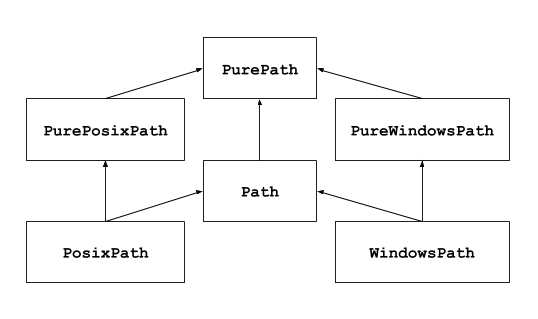

# Пример использования

Просматриваем подкатолги

In [ ]:
p = Path('.')
[x for x in p.iterdir() if x.is_dir()]

[PosixPath('.config'), PosixPath('sample_data')]

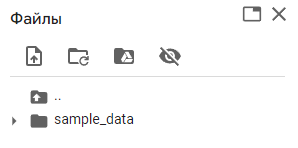


## Pure Paths

Pure Path предоставляет операции обработки пути, которые фактически не обращаются к файловой системе. Есть три способа обратиться к этим классам:

# 1. class pathlib.PurePath(*pathsegments)
Универсальный класс, представляющий системный путь (при его создании создается либо PurePosixPath, либо PureWindowsPath), предоставляет утилиты для обработки пути к файлу и манипулирования им без совершения операций записи, поэтому будет работать вне зависимости от системы вашего коспьютера:

In [ ]:
PurePath('setup.py')

PurePosixPath('setup.py')

Каждый элемент pathsegments (если не указано ничиго то берется текущая директория) может быть либо строкой, представляющей часть пути, либо объектом, реализующим интерфейс os.PathLike, где метод __fspath__() возвращает строку, например другой объект пути:

Пример со строками:

In [ ]:
PurePath('foo', 'some/path', 'bar')

PurePosixPath('foo/some/path/bar')

Пример с объектом типа Path (Главный объект pathlib):

In [ ]:
PurePath(Path('foo'), Path('bar'))

PurePosixPath('foo/bar')

Пример убирания незначащих / и . в обращении к директориям

In [ ]:
PurePath('foo//bar')

PurePosixPath('foo/bar')

In [ ]:
PurePath('foo/./bar')

PurePosixPath('foo/bar')

# 2. class pathlib.PurePosixPath(*pathsegments)
Подкласс класса PurePath, представляет путь к файловой системе, отличный от Windows:

In [ ]:
PurePosixPath('/etc')

PurePosixPath('/etc')

# 3. class pathlib.PureWindowsPath(*pathsegments)
Подкласс класса PurePath, представляет путь к файловой системе типа Windows:

In [ ]:
PureWindowsPath('c:/Program Files/')

PureWindowsPath('c:/Program Files')

Независимо от системы, в которой вы работаете, вы можете создать экземпляр всех этих классов, поскольку они не предоставляют никаких операций, выполняющих системные вызовы.

# Основные особенности

Пути неизменяемы и хешируются. Пути одного и того же типа сравнимы, при чем учитываются тип пути и регистры букв:

In [ ]:
PurePosixPath('foo') == PurePosixPath('FOO')

False

In [ ]:
PureWindowsPath('foo') == PureWindowsPath('FOO')

True

In [ ]:
PureWindowsPath('FOO') in { PureWindowsPath('foo') }

True

In [ ]:
PureWindowsPath('C:') < PureWindowsPath('d:')

True

Пути отличного друг от друга типа не равны друг другу и для них нельзя проводить операции > или <

In [ ]:
PureWindowsPath('foo') == PurePosixPath('foo')

False

In [ ]:
PureWindowsPath('foo') < PurePosixPath('foo')

TypeError: ignored

#Операторы

Оператор слэш создает путь являющийся детским от исходного (родительского).
Если аргументом является абсолютный путь, предыдущий путь игнорируется. В Windows путь от диска не сбрасывается, если аргументом является корневой относительный путь (например, r'\foo'):

In [ ]:
p = PurePath('/etc')
p

PurePosixPath('/etc')

In [ ]:
p / 'init.d' / 'apache2'

PurePosixPath('/etc/init.d/apache2')

In [ ]:
q = PurePath('bin')
'/usr' / q

PurePosixPath('/usr/bin')

In [ ]:
p / '/an_absolute_path'

PurePosixPath('/an_absolute_path')

In [ ]:
PureWindowsPath('c:/Windows', '/Program Files')

PureWindowsPath('c:/Program Files')

Объект Path может использоваться везде, где объект os.PathLike используется

In [ ]:
import os
p = PurePath('/etc')
os.fspath(p)

'/etc'

Строковое представление пути - это сам исходный путь к файловой системе (в нативной форме, например, с ,бэкслешом в Windows), который вы можете передать любой функции работающей с путем как со строкой:

In [ ]:
p = PurePath('/etc')
str(p)

'/etc'

Аналогично, вызов bytes по пути дает необработанный путь к файловой системе в виде объекта bytes, закодированного os.fsencode():

In [ ]:
bytes(p)

b'/etc'

# Доступ к отдельным частям пути
Чтобы получить доступ к отдельным “частям” (компонентам) пути, используются следующее свойство:

**PurePath.parts**


Кортеж, предоставляющий доступ к различным компонентам пути:

In [ ]:
p = PurePath('/usr/bin/python3')
p.parts

('/', 'usr', 'bin', 'python3')

# Примеры методов и свойств

Pure Paths предоставляют следующие методы и свойства:

================================================================================

PurePath.**drive**

Строка, представляющая букву диска или имя, если таковые имеются:

In [ ]:
PureWindowsPath('c:/Program Files/').drive

'c:'

In [ ]:
PureWindowsPath('/Program Files/').drive

''

================================================================================

PurePath.**root**

Строка, представляющая (локальный или глобальный) корень пути, если таковой имеется:

In [ ]:
PureWindowsPath('c:/Program Files/').root

'\\'

In [ ]:
PureWindowsPath('c:Program Files/').root

''

================================================================================

PurePath.**anchor**

Объединение диска и корневого каталога:

In [ ]:
PureWindowsPath('c:/Program Files/').anchor

'c:\\'

In [ ]:
PureWindowsPath('//host/share').anchor

'\\\\host\\share\\'

================================================================================

PurePath.**parents**

Неизменяемый контейнер, обеспечивающий доступ к предкам пути:

In [ ]:
p = PureWindowsPath('c:/foo/bar/setup.py')
p.parents[0]

PureWindowsPath('c:/foo/bar')

In [ ]:
p.parents[1]

PureWindowsPath('c:/foo')

In [ ]:
p.parents[2]

PureWindowsPath('c:/')

PurePath.**parent**
Делает тоже самое что и parents, но выводит первого предка

================================================================================

PurePath.**suffix** и PurePath.**suffixes**

Последнее расширение файла, если таковое имеется (.suffixes выведет все расширения файла):

In [ ]:
PurePosixPath('my/library/setup.py').suffix

'.py'

In [ ]:
PurePosixPath('my/library.tar.gz').suffixes

['.tar', '.gz']

================================================================================

PurePath.**stem**

Конечный компонент пути без его суффикса:

In [ ]:
PurePosixPath('my/library.tar.gz').stem

'library.tar'

================================================================================

PurePath.**as_posix()**

Возвращает строковое представление пути с /:

In [ ]:
p = PureWindowsPath('c:\\windows')
str(p)

'c:\\windows'

In [ ]:
p.as_posix()

'c:/windows'

================================================================================

PurePath.**is_absolute()**

Возвращает, является ли путь абсолютным или нет. Путь считается абсолютным, если у него есть как корень, так и (если позволяет конфигурация) диск:

In [ ]:
PurePosixPath('/a/b').is_absolute()

True

In [ ]:
PurePosixPath('a/b').is_absolute()

False

In [ ]:
PureWindowsPath('c:/a/b').is_absolute()

True

In [ ]:
PureWindowsPath('c:').is_absolute()

False

================================================================================

PurePath.**is_relative_to()**

Возвращает, является ли этот путь относительным к другому пути или нет.

In [ ]:
p = PurePath('/etc/passwd')
p.is_relative_to('/etc')

True

================================================================================

# Concrete paths

Concrete paths - подклассы классов Pure Path. Они наследуют манипуляции от родительского класса и добавляет операции ввода/вывода, которые выполняют системные вызовы, из - за чего работают, не на любой системе. Существует три способа создания экземпляров конкретных путей (арги pathsegments в них такие же как и в PurePaths).

# 1. class pathlib.Path(*pathsegments)
Подкласс PurePath, этот класс представляет конкретные пути системного типа Path (при его создании создается либо PosixPath, либо WindowsPath).:

In [ ]:
Path('setup.py')

PosixPath('setup.py')

# 2. class pathlib.PosixPath(*pathsegments)
Подкласс Path и PurePosixPath, этот класс представляет конкретные пути к файловой системе, отличной от Windows:

In [ ]:
PosixPath('/etc')

PosixPath('/etc')

#3. class pathlib.WindowsPath(*pathsegments)
Подкласс Path и PurePosixPath, этот класс представляет конкретные пути к файловой системе Windows:

In [ ]:
WindowsPath('c:/Program Files/')

NotImplementedError: ignored

Т.к. коллаб используется в системе линукс, нам не позволяют создать этот класс.
Эти классы можно создавать только на соответсвующих системах

# Примеры дополнительных методов

Concrete Paths предоставляют следующие методы в дополнение к методам чистых путей. Многие из этих методов могут вызывать ошибку OSError при сбое системного вызова (например, из-за того, что путь не существует).

================================================================================

Path.**cwd()**

Возвращает новый объект типа Path, представляющий текущий каталог (возвращаемый os.getcwd()):

In [ ]:
Path.cwd()

PosixPath('/content')

================================================================================

Path.**home()**

Возвращает новый объект Path, представляющий домашний каталог пользователя (возвращаемый os.path.expanduser() с помощью ~ construct). Если домашний каталог не определен, возникает ошибка RuntimeError.

In [ ]:
Path.home()

PosixPath('/root')

================================================================================

Path.**stat(*, follow_symlinks=True)**

Возвращает объект os.stat_result, содержащий информацию об этом пути, например os.stat(). Результат просматривается при каждом вызове этого метода.

Этот метод обычно следует за символическими ссылками; чтобы указать символическую ссылку, добавьте аргумент follow_symlinks=False или используйте lstat().

In [ ]:
p = Path('/root')
p.stat().st_size

4096

In [ ]:
p.stat().st_mtime

1700577797.0

================================================================================

Path.**chmod(mode, *, follow_symlinks=True)**


Изменет режим файла и права доступа, как os.chmod().

Этот метод обычно следует за символическими ссылками. Некоторые версии Unix поддерживают изменение разрешений для самой символической ссылки; на этих платформах вы можете добавить аргумент follow_symlinks=False или использовать lchmod().

In [ ]:
p.stat().st_mode

16832

In [ ]:
p.chmod(0o444)
p.stat().st_mode

16676

================================================================================

Path.**exists(*, follow_symlinks=True)**


Возвращает True, если путь указывает на существующий файл или каталог.

Этот метод обычно использует символические ссылки; чтобы проверить, существует ли символическая ссылка, добавьте аргумент follow_symlinks=False.

In [ ]:
Path('.').exists()

True

In [ ]:
Path('setup.py').exists()

False

================================================================================

Path.**expanduser()**


Возвращает новый путь с расширенными конструкциями ~ и ~user, возвращаемый os.path.expanduser(). Если домашний каталог не может быть определен, возникает  RuntimeError.

In [ ]:
p = PosixPath('~/films/Monty Python')
p.expanduser()

PosixPath('/root/films/Monty Python')

================================================================================

Path.**touch()**

Создайте файл по указанному пути. Если указан режим, он объединяется со значением umask процесса для определения режима файла и флагов доступа. Если файл уже существует, функция завершается успешно, если exist_ok имеет значение true (и время его модификации обновляется до текущего времени), в противном случае возникает FileExistsError.

In [74]:
file = Path('/amogus.txt')
file.exists()

False

In [75]:
file.touch(exist_ok = False)
file.exists()

True

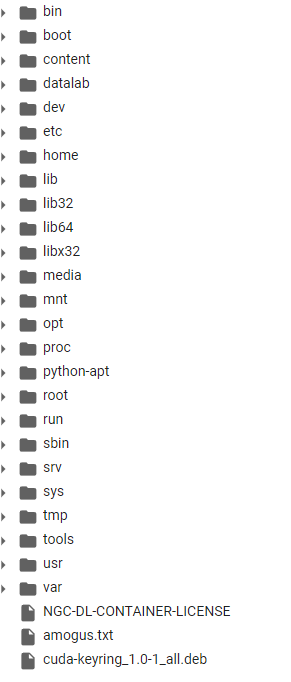

Ура, сделали файл!

#Итог

Таким образом, pathlib очень полезная библиотека для работы с фалами. Она обеспечивает одинаковую работу ваших путей к файлам в разных операционных системах. Кроме того, она предоставляет функциональные возможности и операции, которые помогут сэкономить время при обработке и манипулировании путями. Благодаря ей можно создавать пути вне зависимости от операционной системы, что может быть очень полезно!

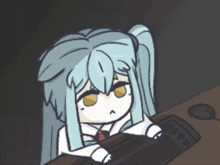